In [1]:
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
engine_mysql = 'mysql+pymysql://root:@localhost:3306/facts_dims'

In [3]:
engine = sqlalchemy.create_engine(engine_mysql)

In [4]:
sql = """SELECT * FROM `fato` 
         LEFT JOIN `dim_orgao_superior` ON `fato`.`CÓDIGO ÓRGÃO SUPERIOR` = `dim_orgao_superior`.`CÓDIGO ÓRGÃO SUPERIOR`
         LEFT JOIN `dim_orgaos` ON `fato`.`CÓDIGO ÓRGÃO` = `dim_orgaos`.`CÓDIGO ÓRGÃO`"""

In [6]:
df = pd.read_sql(sql,engine)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382728 entries, 0 to 4382727
Data columns (total 11 columns):
index                    int64
CÓDIGO ÓRGÃO SUPERIOR    int64
CÓDIGO ÓRGÃO             int64
DETALHAMENTO             object
VALOR LANÇADO            object
Tipo                     object
Data                     datetime64[ns]
CÓDIGO ÓRGÃO SUPERIOR    int64
NOME ÓRGÃO SUPERIOR      object
CÓDIGO ÓRGÃO             int64
NOME ÓRGÃO               object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 367.8+ MB


In [8]:
import locale

In [9]:
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [10]:
locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [11]:
df['Valor'] = pd.to_numeric(df['VALOR LANÇADO'].replace(',','.', regex=True).astype(float))

In [27]:
#df['Valor2'] = df['Valor'].map(locale.currency)

In [12]:
df_2019 = df[((df['Data'] > '2019-01-01') & (df['Data'] < '2019-12-31'))]

In [13]:
df_2019['NOME ÓRGÃO SUPERIOR'].unique()

array(['Advocacia-Geral da União',
       'Ministério da Agricultura, Pecuária e Abastec',
       'Ministério da Cidadania',
       'Ministério da Ciência, Tecnologia, Inovações ',
       'Ministério da Defesa', 'Ministério da Economia',
       'Ministério da Educação', 'Ministério da Infraestrutura',
       'Ministério da Justiça e Segurança Pública',
       'Ministério da Mulher, Família e Direitos Huma',
       'Ministério da Previdência Social', 'Ministério da Saúde',
       'Ministério das Mulheres, Igualdade Racial, da',
       'Ministério das Relações Exteriores',
       'Ministério de Minas e Energia',
       'Ministério do Desenvolvimento Regional', 'Ministério do Esporte',
       'Ministério do Meio Ambiente', 'Ministério do Turismo',
       'Presidência da República', 'Sem informação',
       'Controladoria-Geral da União'], dtype=object)

In [14]:
df_2019_edu = df_2019[df_2019['NOME ÓRGÃO SUPERIOR']=='Ministério da Educação']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


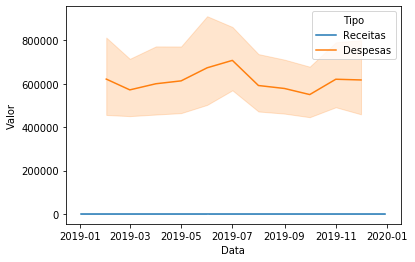

In [15]:
#Receitas vs Despesas do Ministerio da Educação
sns.lineplot(data=df_2019_edu, x='Data', y='Valor',hue='Tipo')

In [30]:
#Comparação de Despesas entre Orgãos
#Ministerio da Educação vs Ministerio da Defesa
df_2019_edu_e_def = df_2019[((df_2019['NOME ÓRGÃO SUPERIOR'] =='Ministério da Educação') | (df_2019['NOME ÓRGÃO SUPERIOR']=='Ministério da Defesa'))]
df_2019_edu_e_def_desp = df_2019_edu_e_def[df_2019_edu_e_def['Tipo']=='Despesas']

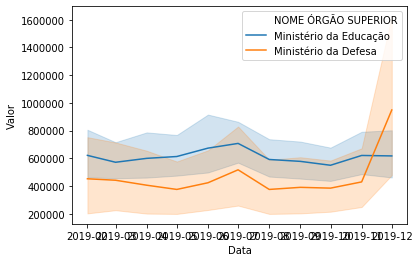

In [32]:
sns.lineplot(data=df_2019_edu_e_def_desp,x='Data',y='Valor',hue='NOME ÓRGÃO SUPERIOR')

In [33]:
#Comparação de Despesas entre Orgãos
#Ministerio da Saude vs Ministerio da Defesa
df_2019_sau_e_def = df_2019[((df_2019['NOME ÓRGÃO SUPERIOR'] =='Ministério da Saúde') | (df_2019['NOME ÓRGÃO SUPERIOR']=='Ministério da Defesa'))]
df_2019_sau_e_def_desp = df_2019_sau_e_def[df_2019_sau_e_def['Tipo']=='Despesas']

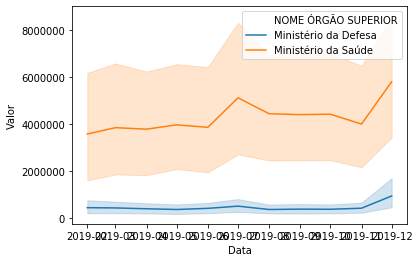

In [34]:
sns.lineplot(data=df_2019_sau_e_def_desp,x='Data',y='Valor',hue='NOME ÓRGÃO SUPERIOR')